# Project : In Montomery County, MD, what factors have the biggest influence in car accidents?
# Factors Analyzed: Hour of Accident, Vehicle Year, Speed Limit, Weather, Direction, Driver Fault 

### Team - Zamunda Warriors: Amari, Isaac, Nicolas, Terrence
### Data provided by [Montgomery County MD](https://data.montgomerycountymd.gov/)

In [108]:
!pip install folium

In [109]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# python3 -m pip install folium

In [110]:
#read in driver dataset
drivers = pd.read_csv("https://raw.githubusercontent.com/terrydiko/INST447Project/main/Drivers.csv", encoding='utf-8', dtype="str")
drivers

,report_number,driver_at_fault,speed_limit,vehicle_year
0,MCP3239001B,Yes,15,2006
1,MCP3290000G,Yes,40,2006
2,MCP3283000M,Yes,30,2018
3,MCP2892009B,No,35,2013
4,MCP2892009B,Yes,35,0
...,...,...,...,...
123287,MCP2783000G,No,40,2002
123288,MCP2686000D,No,40,2007
123289,MCP2686000D,Yes,40,2010
123290,MCP11520005,Yes,35,2008


In [111]:
#read in incidents dataset
incidents = pd.read_csv("https://raw.githubusercontent.com/terrydiko/INST447Project/main/Incidents.csv", encoding= 'utf-8', dtype="str")
incidents

,report_number,agency_name,acrs_report_type,crash_date_time,direction,weather,latitude,longitude
0,MCP3239001B,Montgomery County Police,Injury Crash,2021-04-28T21:09:00.000,NaN,CLEAR,39.04605063,-76.99075732
1,MCP3290000G,Montgomery County Police,Property Damage Crash,2021-04-28T21:01:00.000,South,CLEAR,39.059336,-76.944363
2,MCP3283000M,Montgomery County Police,Property Damage Crash,2021-04-28T20:37:00.000,East,CLEAR,39.0471,-77.225175
3,MCP2892009B,Montgomery County Police,Property Damage Crash,2021-04-28T17:58:00.000,South,CLEAR,39.01532,-77.042505
4,MCP2899004S,Montgomery County Police,Property Damage Crash,2021-04-28T17:34:00.000,South,CLEAR,39.139095,-77.26846667
...,...,...,...,...,...,...,...,...
69553,MCP23000002,Montgomery County Police,Property Damage Crash,2015-01-01T02:00:00.000,North,CLEAR,39.148678,-77.093848
69554,MCP2674000D,Montgomery County Police,Property Damage Crash,2015-01-01T01:26:00.000,North,CLEAR,39.158059,-77.204349
69555,MCP2783000G,Montgomery County Police,Injury Crash,2015-01-01T01:14:00.000,East,CLEAR,39.09621667,-77.10980333
69556,MCP2686000D,Montgomery County Police,Property Damage Crash,2015-01-01T01:10:00.000,South,NaN,39.19661,-77.26554667


In [112]:
#merge the two datasets
merge_data = incidents.merge(drivers, on='report_number', how='inner')
merge_data["vehicle_year"] = merge_data["vehicle_year"].apply(lambda x : int(x))
merge_data = merge_data.dropna()

## At this point, we know what factors we want to analyze to answer the main question. Now, we begin that the data cleaning process. That starts with identifying the unique values of each factor, and then get rid of any null, blank, unknown, or erroneous values.

In [113]:
# Unique values for year, weather, direction, speed limit, and driver fault
print('Year Values: ' + str(sorted(merge_data["vehicle_year"].unique())))
print("\n")
print('Weather  Values: ' + str(sorted(merge_data["weather"].unique())))
print("\n")
print('Direction Values: ' + str(sorted(merge_data["direction"].unique())))
print("\n")
print('Speed Limit Values: ' + str(sorted(merge_data["speed_limit"].unique())))
print("\n")
print('Driver Fault Values: ' + str(sorted(merge_data["driver_at_fault"].unique())))
print("\n")

Year Values: [0, 1, 2, 3, 4, 8, 13, 14, 15, 97, 99, 198, 200, 201, 202, 215, 1005, 1014, 1015, 1025, 1111, 1140, 1234, 1900, 1901, 1947, 1949, 1955, 1959, 1960, 1963, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2033, 2040, 2041, 2055, 2099, 2100, 2103, 2104, 2200, 2204, 2911, 2912, 2914, 2917, 2991, 2996, 2998, 3003, 3013, 3863, 5005, 8008, 8888, 9999]


Weather  Values: ['BLOWING SAND, SOIL, DIRT', 'BLOWING SNOW', 'CLEAR', 'CLOUDY', 'FOGGY', 'OTHER', 'RAINING', 'SEVERE WINDS', 'SLEET', 'SNOW', 'UNKNOWN', 'WINTRY MIX']


Direction Values: ['East', 'North', 'South', 'Unknown', 'West']


Speed Limit Values: ['0', '10', '15', '20', '25', '30', '35', '40', '45', '5', '50', '55', '60', '65', '70']


In [114]:
#cleaning merged data based on unique value results
merge_data = merge_data.query("vehicle_year >= 1960 and vehicle_year <= 2021")
merge_data = merge_data.query("direction != 'Unknown'")
merge_data = merge_data.query("driver_at_fault != 'Unknown'")
merge_data = merge_data.query("weather not in ['OTHER','UNKNOWN']")
merge_data.head()

,report_number,agency_name,acrs_report_type,crash_date_time,direction,weather,latitude,longitude,driver_at_fault,speed_limit,vehicle_year
1,MCP3290000G,Montgomery County Police,Property Damage Crash,2021-04-28T21:01:00.000,South,CLEAR,39.059336,-76.944363,Yes,40,2006
2,MCP3283000M,Montgomery County Police,Property Damage Crash,2021-04-28T20:37:00.000,East,CLEAR,39.0471,-77.225175,Yes,30,2018
3,MCP2892009B,Montgomery County Police,Property Damage Crash,2021-04-28T17:58:00.000,South,CLEAR,39.01532,-77.042505,No,35,2013
5,MCP2899004S,Montgomery County Police,Property Damage Crash,2021-04-28T17:34:00.000,South,CLEAR,39.139095,-77.26846667,Yes,55,2015
6,MCP2864003Y,Montgomery County Police,Property Damage Crash,2021-04-28T16:26:00.000,West,CLEAR,39.10029167,-77.18490833,Yes,40,2006


## The merged dataset is now cleaned and ready for further analysis. We now move into creating sub dataframes for each factor, getting the count for each of the factor values.

In [115]:
#strip time from Date/Time column
merge_data[['Date', 'Time']] = merge_data['crash_date_time'].str.split('T', expand=True)
merge_data = merge_data.drop(['crash_date_time'], axis=1)

#calculate hour of day
merge_data['Hour'] = pd.to_datetime(merge_data['Time']).dt.hour
merge_data.head()

#calculate accidents by hour
hour = merge_data[['report_number', 'Hour']]
hour = hour.groupby('Hour').count().reset_index()
hour.columns = ['Hour', 'num_accidents']
hour = hour.sort_values(by='num_accidents', ascending=False)
hour.head()

,Hour,num_accidents
17,17,8164
16,16,7710
15,15,7498
18,18,7137
8,8,6530


In [116]:
# calculate accidents by year
year = merge_data[["report_number", "vehicle_year"]]
year = year.groupby("vehicle_year").count().reset_index()
year.columns = ["vehicle_year", "num_accidents"]
year = year.sort_values(by="vehicle_year", ascending=False)
year = year.head(20).sort_values(by="vehicle_year")
year["vehicle_year"] = year["vehicle_year"].apply(lambda x : str(x))
year = year.sort_values(by='num_accidents', ascending=False)
year.head()

,vehicle_year,num_accidents
51,2015,7124
50,2014,7066
49,2013,6747
52,2016,6168
48,2012,5845


In [117]:
#calculate accidents by speed limit
speed = merge_data[["report_number", "speed_limit"]]
speed = speed.groupby("speed_limit").count().reset_index()
speed.columns = ["speed_limit", "num_accidents"]
speed.speed_limit = speed.speed_limit.astype(int)
speed = speed.sort_values('num_accidents', ascending=False)
speed.head()

,speed_limit,num_accidents
6,35,30371
7,40,22824
5,30,14773
4,25,13648
8,45,8486


In [118]:
# calculate accidents by weather
weather = merge_data[["report_number", "weather"]]
weather = weather.groupby("weather").count().reset_index()
weather.columns = ["weather", "num_accidents"]
weather = weather.sort_values(by="num_accidents", ascending=False)
weather.head()

,weather,num_accidents
2,CLEAR,71163
5,RAINING,13816
3,CLOUDY,11510
8,SNOW,1125
4,FOGGY,452


In [119]:
# calculate accidents by direction 
direction = merge_data[["report_number", "direction"]]
direction = direction.groupby("direction").count().reset_index()
direction.columns = ["direction", "num_accidents"]
direction = direction.sort_values(by="num_accidents", ascending=False)
direction.head()

,direction,num_accidents
1,North,41759
0,East,25069
2,South,19479
3,West,12451


In [120]:
# calculate accidents by driver fault
fault= merge_data[["report_number", "driver_at_fault"]]
fault = fault.groupby("driver_at_fault").count().reset_index()
fault.columns = ["fault", "num_accidents"]
fault = fault.sort_values(by="num_accidents", ascending=False)
fault.head()

,fault,num_accidents
1,Yes,51454
0,No,47304


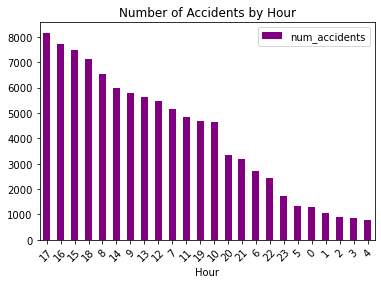

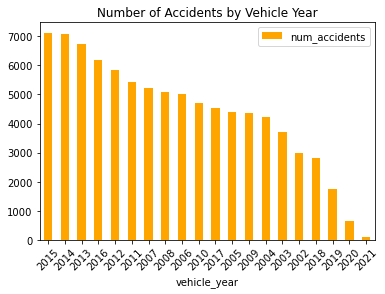

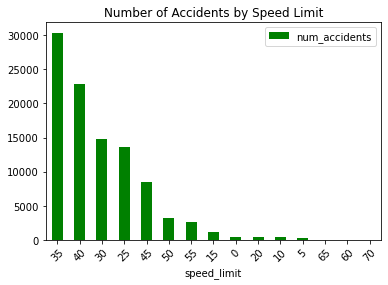

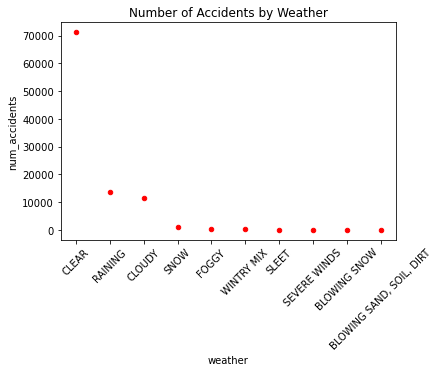

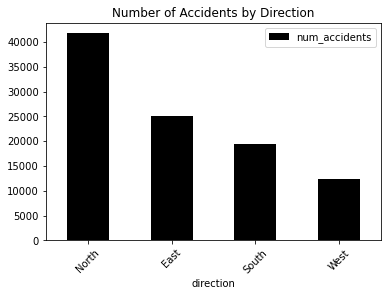

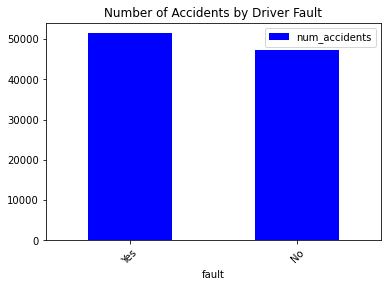

In [124]:
#hour plot
hour.plot.bar(x='Hour', y='num_accidents', rot=45, title="Number of Accidents by Hour", color='purple');

#year plot
year.plot.bar(x='vehicle_year', y='num_accidents', rot=45, title="Number of Accidents by Vehicle Year", color="orange");

#speed limit plot
speed.plot.bar(x='speed_limit', y='num_accidents', rot=45, title="Number of Accidents by Speed Limit", color="green");

#weather plot
weather.plot(kind='scatter', x='weather', y='num_accidents', rot=45, title="Number of Accidents by Weather", color="red");

#direction plot
direction.plot.bar(x='direction', y='num_accidents', rot=45, title="Number of Accidents by Direction", color="black");

#driver fault plot
fault.plot.bar(x='fault', y='num_accidents', rot=45, title="Number of Accidents by Driver Fault", color="blue");

## Analysis by plot
- Accidents by Hour: The number of accidents by hour provides an interesting dynamic. As shown by the graph,  the top 3 hours are 5pm, 4pm, and 3pm. Then, 8am comes in as the 4th highest count of all the hours. The    count then declines with a mix of morning and early evening hours. We assume that this is due to more       traffic on the road. The morning rush of people going to work and evening rush hour of people heading       home are why there is a higher count of accidents during the morning and late afternoon.
- Accidents by Vehicle Year: This graph focuses on vehicle years between 2002-2021. Our initial thought was that older vehicles are more prone to accidents due to newer vehicles having more safety features. However, that was not the case. The graph shows that vehicles of the 2015 year lead the amount of vehicles involved in accidents. In fact, the top 5 years were all in the 2010s. The count per year has a steady decline for the most part. We also can consider the fact that not as many older vehicles may be on the road as older vehicles.
- Accidents by Speed Limit: This was one of the most intruiging graphs because speed is often a factor in accidents. This graph shows that roads with a speed limit of 35mph lead the count of accidents. We hypothesize that this is due to people speeding on roads with this limit and not following the rules. If there are drivers doing the limit, and there is a driver driving recklessly, an accident can be caused due the increase in speed. Our hypothesis can be confirmed by looking at the end of the graph. Roads with 70mph  have the lowest amount of accident counts. This supports our hypothesis because in the 70mph roads, everyone is going at a higher rate of speed consistently, decreasing the chance of accident. However, for the roads with a lower limit, some drivers may be impatient and decide to go above posted speed, which can cause a crash with drivers following the posted speed.
- Accidents by Weather: This graph was surprising because we assumed that more messier weather such as rain and snow would have the highest counts of accidents. However, clear weather, meaning when it's sunny, leads all weather in the count of accidents. This shows that weather is not much of a big influence on crashes as it may seem to be. Even cloudy comes in before snow, so weather may be on the low end of influence.
- Accidents by Direction: We considered analyzing this factor to see if a driver's direction could be an influence on accidents. North lead the count of accidents by a decent margin, being followed by East, then South and West. We are not sure what factor is leading to driver's traveling North having more accidents, but the analysis is intruiging nonetheless.
- Accidents by Driver Fault: Laslty, we analyzed the count of accidents based on whether the driver was deemed at fault or not. Surprisingly, the number of drivers that were not at fault is only about 4000 less accidents than the drivers that were at fault. Now, this analysis is a bit tricky because you have to take into consideration a driver being faulted for hitting another driver, who is not faulted. Therefore, the analysis is not that surprising because there could be another driver on the end of a driver at fault accident, which causes an increase in the number "No".

## Final Analysis
- Our final analysis is that accidents can be caused by various factors. We believe that the strongest factors are the hour of day, speed limit of the road, and direction of travel. The hour of day can depit the level of traffic. An increase in traffice can lead to more accidents. Lower speed limits can be ignored by drivers at times. If an area has a low rate of speed, the driver may drive faster to get through the area quicker. However, their speed now becomes an outlier to the drivers that are doing the posted speed, which can cause an increase in accidents. Lastly, direction can play a part in the number of accidents if many people are traveling in the same direction at once. Also, there are even cases of people crossing the opposite side of the road, causing head on collisions.
- Nonetheless, we must remember that this data is only being sourced from Montgomery County, MD, a small subset of crash data worldwide. Further analysis and more data is needed to effectively conclude on what factors, if any, are big influences on accidents, or are certain factors combined a big influence on crashes. 

In [122]:
#m = folium.Map(location=[38.86948278, -76.96897301], default_zoom_start=200)

#for xy in x_y:
#    folium.Marker(location=xy, popup='You found a crash').add_to(m)

#m